# Decaimento Radioativo

O problema do decaimento radioativo é dado por uma amostra radioativa de material possuindo N núcleons que irão decair aleatoriamente em algum instante t. O problema é determinar quantos núcleons estarão em estado de emissão (ainda não decaídos) sabendo num dado instante inicial a população.


O nosso modelo será dado conforme [Física em computadores] - Coleção CBPF - Paulo e Suzana Oliveira. Escrito da forma N(t+Δt) = N(t)(1 - αΔt).

Para o nosso caso específico usaremos os valores do Rb⁸², com decaimento α = 9.24e-3 s^(-1). Podemos entretanto realizar uma tabela com os valores dos decaimentos de outras substâncias. Fazer a leitura desse arquivo e atribuir o tempo de decaimento.

In [5]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# tabela contendo algumas valores para o tempo de meia-vida de algumas substâncias
# que irão decair (dado em segundos)
#--------------------------------------------------------------------------------
# A tabela é carregada na memória de maneira a no fim se transformar em um dicionário
# onde a chave é o nome do elemento e o valor é seu tempo de meia-vida

def data_form():
    arqv = open('decaimento_tabela.csv','r')
    data = []
    colunas = arqv.read().split('\n')
    colunas.pop()
    for coluna in colunas:
        split_row = coluna.split(",")
        data.append(split_row)

    data = dict(data) 
    data.pop('nome') # é removida o header das colunas a fim de obter apenas os elementos e as meias-vidas
    arqv.close()
    return data

In [6]:
def decaimento():
    try:
        data = data_form()
        nome = input("nome tabelado: ")
        if nome in data:
            popInit = int(input("População Inicial: "))
            if popInit <= 0:
                print("Alerta!!! População Inicial menor ou igual a 0!\n Tente novamente:\n")
                decaimento()
            else:
                t = int(input("Tempo de simulação (em potência de 10):"))
                plotGraphic(nome, popInit, t, data)
        else:
            print("\nElemento não encontrado!\n" +
                   "Se deseja inserir esse elemento na lista, digite 1\n" +
                   "Se deseja consultar um elemento tabelado, digite 2\n" +
                   "Para encerrar, digite 0")
            
            x = int(input())
            try:
                if x == 0:
                    pass
                elif x == 2:
                    decaimento()
                elif x == 1:
                    arqv = open('decaimento_tabela.csv','a')
                    arqv.write(nome + ',' + input("determine o tempo de meia vida em segundos: ") + '\n' )
                    arqv.close()
                    decaimento()
            except ErrorValue:
                print("Valor indevido!")
                
    
    except IOError:
        print("Num deu!")
        
def plotGraphic(nome, popInit, tempo,data):
    N, constDecaimento = propertys(nome, float(data[nome]), popInit, tempo)
    t = [t for t in range(len(N))]
    _, axes = plt.subplots(1, 2, figsize=(10,4))
    axes[0].plot([item for item in t[0:len(t):10]], N[0:len(N):10],
                 label = "curva de decaimento")                      
    axes[0].set_title("log N(t)")
    axes[0].set_yscale("log")
    axes[1].plot([item for item in t[0:len(t):10]], N[0:len(N):10],
                 label = "curva de decaimento")                      
    axes[1].set_title("N(t)")
    plt.show()
        
def propertys(nome , meiaVida , popInit, tempo):
    try:
        Delta_t = 1
        alpha = np.log(2)/meiaVida
        N = [popInit]
        tempoAmostragem = 10**tempo
        for n in range(1,tempoAmostragem):
            N.append(N[n-1]*(1-alpha*Delta_t))
        
        return N, alpha
    
    except ErroType:
        print("Tempo de amostragem deve ser uma potência de 10!")
    

nome tabelado: rubideo-82
População Inicial: 100000
Tempo de simulação (em potência de 10):3


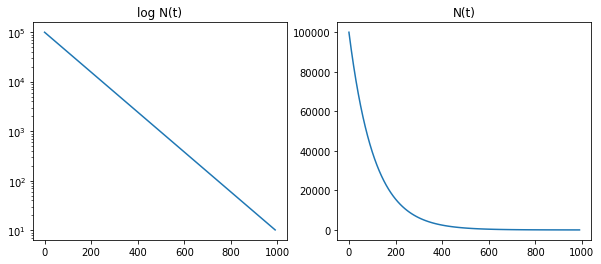

In [7]:
decaimento()
